In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


I: mean=7.500909090909093, var=4.127269090909091, corr=(0.81642051634484, 0.0021696288730787875)
II: mean=7.500909090909091, var=4.127629090909091, corr=(0.8162365060002427, 0.0021788162369108027)
III: mean=7.500000000000001, var=4.12262, corr=(0.8162867394895982, 0.002176305279228025)
IV: mean=7.50090909090909, var=4.12324909090909, corr=(0.8165214368885029, 0.002164602347197218)


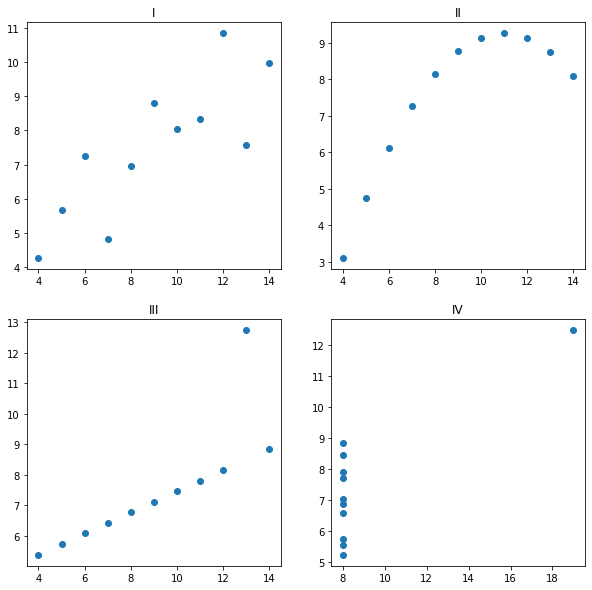

In [5]:
plt.subplots(2,2, figsize=(10,10))
for index, ds in  enumerate(['I','II','III','IV'],1):
    df_tmp = df.query(f" dataset=='{ds}' ")
    plt.subplot(2,2,index)
    plt.scatter(df_tmp.x, df_tmp.y)
    plt.title(ds)
    print(f"{ds}: mean={df_tmp.y.mean()}, var={df_tmp.y.var()}, corr={pearsonr(df_tmp.y, df_tmp.x)}")

In [6]:
def estimate_coef(x, y):
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    a = ((x-xmean)*(y-ymean)).sum() / ((x-xmean)**2).sum()
    b = ymean - a*xmean
    return a,b

In [7]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x, y, c='g')
    
    a,b=coef
    y_pred=a*x+b
    plt.plot(x, y_pred, c='r')

In [8]:
np.random.seed(42)
N = 150
X = 6*np.random.randn(N) - 3
y = 2*X + np.random.randn(N)*2

In [9]:
coef = estimate_coef(X, y)
coef

(1.9913880557491253, 0.1123696988858871)

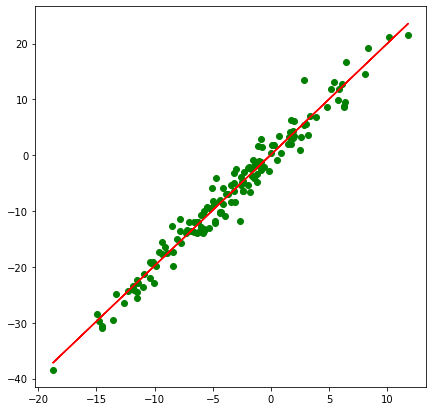

In [10]:
plot_lines(X, y, coef)

In [11]:
pearsonr(X, y)

(0.9839362905869267, 1.182107252362632e-112)

### Użycie biblioteki scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression

In [17]:
X.ndim

1

In [18]:
model = LinearRegression()
model.fit(X.reshape(-1,1) , y)

LinearRegression()

In [20]:
model.coef_ , model.intercept_

(array([1.99138806]), 0.1123696988858871)

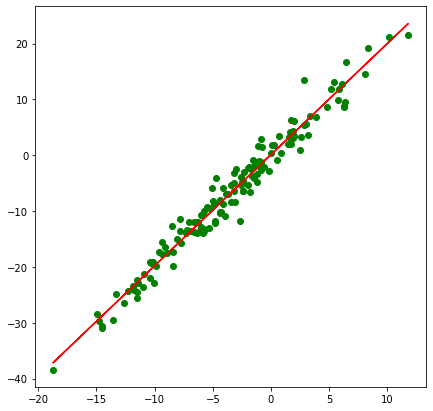

In [21]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [22]:
# importowanie metryk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# obliczanie wartosci predykcyjnych
y_pred = model.predict(X.reshape(-1,1))

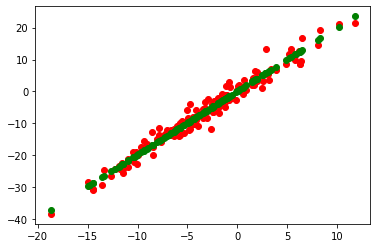

In [26]:
plt.scatter(X, y, c="r")
plt.scatter(X, y_pred, c="g")

In [27]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), r2_score(y, y_pred)

(1.6007665768345867, 4.145397778686192, 0.9681306239339611)

### Efekt lejka

In [29]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [30]:
df.corr()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [31]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [32]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [33]:
model.coef_, model.intercept_

(array([0.04753664]), 7.0325935491276965)

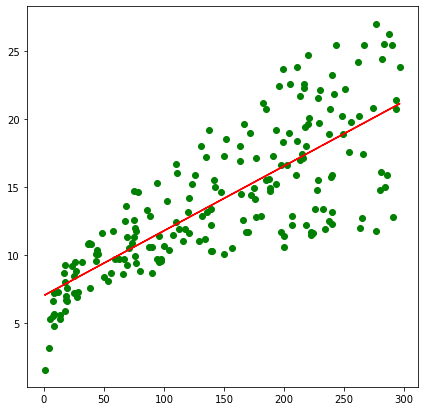

In [34]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [35]:
y_pred = model.predict(X)
r2_score(y, y_pred)

0.611875050850071

In [37]:
df.query(" TV>=250 ").corr()

,TV,sales
TV,1.000000,0.124146
sales,0.124146,1.000000


In [38]:
df.query(" TV>=50 and TV<=100 ").corr()

,TV,sales
TV,1.000000,0.221368
sales,0.221368,1.000000


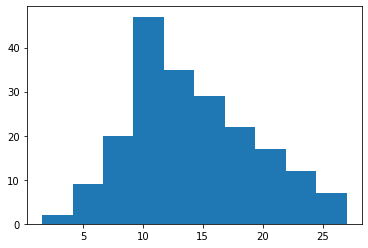

In [42]:
plt.hist(df.sales, bins=10)
plt.show()

### Regresja wielomianowa

In [74]:
np.random.seed(0)

X = np.arange(-4, 4.2, 0.2)
y = ((X-2)*(X+4)*(X+1)*(X-1)*(X-3))/14 + np.random.normal(-2.5, 2.5, len(X) )

X = X.reshape(-1,1)

In [75]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

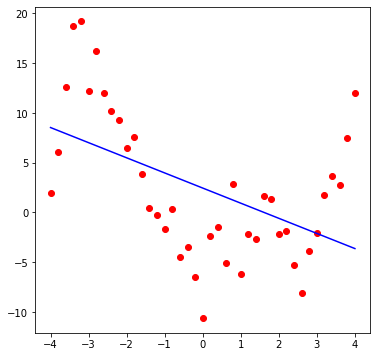

In [76]:
plt.figure(figsize=(6,6))
plt.scatter(X, y, c="r")
plt.plot(X, y_pred, c="b")

In [77]:
r2_score(y, y_pred)

0.2456973012029272

In [78]:
# przygotowanie danych X do regresji w stopniu >1
from sklearn.preprocessing import PolynomialFeatures

In [79]:
pf = PolynomialFeatures(degree=3)
X_poly = pf.fit_transform(X)

In [80]:
X[0]

array([-4.])

In [81]:
X_poly[0]

array([  1.,  -4.,  16., -64.])

In [82]:
X.shape, X_poly.shape

((41, 1), (41, 4))

D=7, R2=0.8831826910348755
D=23, R2=0.951205706228542
D=51, R2=0.5446037451617318
D=126, R2=0.2615133303288173


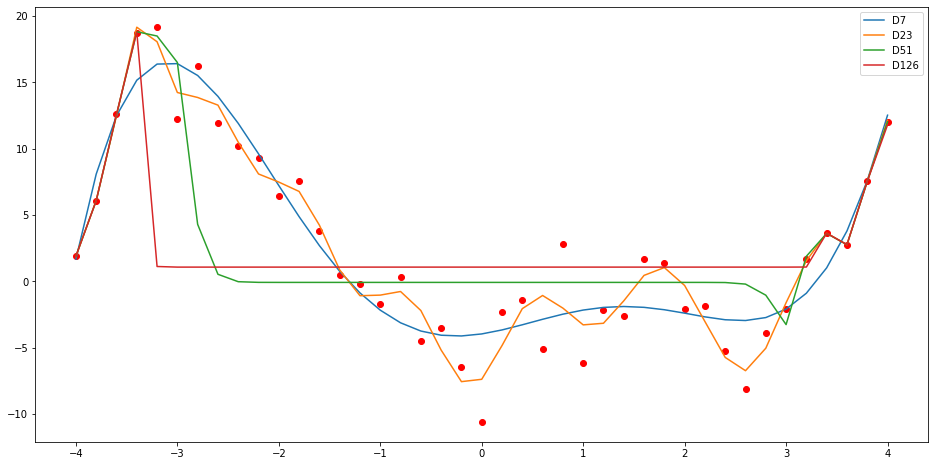

In [83]:
plt.figure(figsize=(16,8))
plt.scatter(X, y, c='r')

for degree in [7, 23, 51, 126]: # range(2,128,10):
    pf = PolynomialFeatures(degree=degree)
    X_poly = pf.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.plot(X, y_pred, label=f"D{degree}")
    print(f"D={degree}, R2={r2_score(y, y_pred)}")
    
plt.legend()
plt.show()

### Regularyzacja

In [84]:
# klasy do regularyzacji
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [85]:
np.random.seed(0)
X = np.unique( np.random.uniform(-3,3, 100) )
y = 1/2*(X**2) + X + 2 + np.random.normal(0, 1, len(X))

X = X.reshape(-1,1)

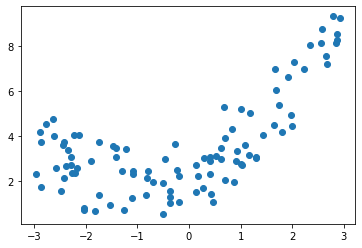

In [86]:
plt.scatter(X, y)

RW: R2=0.8398411453424146
Lasso: R2=0.7560846372182832
Ridge: R2=0.8375368368826693
ElasticNet: R2=0.7609800429915305


C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.8020675781386, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(
C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.31831426733647, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(


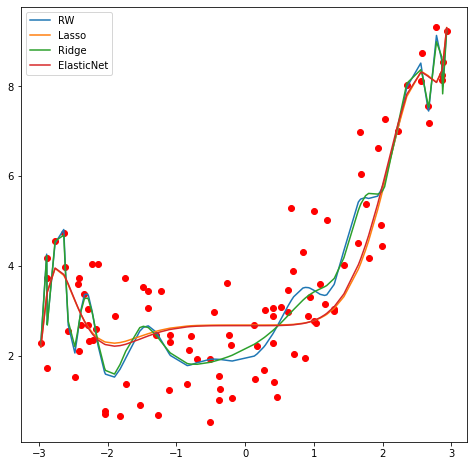

In [96]:
plt.figure(figsize=(8,8))
plt.scatter(X, y, c="r")

pf = PolynomialFeatures(degree=31)
X_poly = pf.fit_transform(X)

#RW
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="RW")
print(f"RW: R2={r2_score(y,y_pred)}")

#Lasso
model = Lasso()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Lasso")
print(f"Lasso: R2={r2_score(y,y_pred)}")

#Ridge
model = Ridge()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Ridge")
print(f"Ridge: R2={r2_score(y,y_pred)}")

#ElasticNet
model = ElasticNet()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="ElasticNet")
print(f"ElasticNet: R2={r2_score(y,y_pred)}")


plt.legend()

### Regresja wielozmienna

In [97]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [98]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [99]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [100]:
# konwersja z wart. imperialnych na metryczne
df.Height *= 2.54
df.Weight /= 2.2

In [101]:
df

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364
...,...,...,...
9995,Female,168.078536,62.171570
9996,Female,170.350573,77.667230
9997,Female,162.224700,58.397872
9998,Female,175.346978,74.478392


<AxesSubplot:xlabel='Weight', ylabel='Count'>

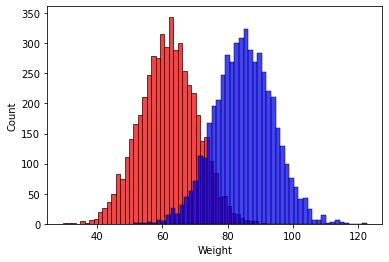

In [107]:
sns.histplot(df.query(" Gender=='Female' ").Weight, color="red")
sns.histplot(df.query(" Gender=='Male' ").Weight, color="blue")

In [109]:
df = pd.get_dummies(df)
del(df["Gender_Male"]) #usuniecie nadmiarowej kolumny/cechy
df

,Height,Weight,Gender_Female
0,187.571423,109.951620,0
1,174.706036,73.777488,0
2,188.239668,96.700389,0
3,182.196685,100.019305,0
4,177.499761,93.795364,0
...,...,...,...
9995,168.078536,62.171570,1
9996,170.350573,77.667230,1
9997,162.224700,58.397872,1
9998,175.346978,74.478392,1


In [110]:
# zmiana nazwy kolumny
# 0 - male
# 1 - female
df.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df.sample(n=5, random_state=0)

,Height,Weight,Gender
9394,164.398647,62.766271,1
898,170.871313,85.165166,0
2398,189.283269,98.424178,0
5906,167.335236,59.891565,1
2343,164.709605,71.690199,0


In [111]:
model = LinearRegression()
model.fit( df[["Height","Gender"]] , df.Weight )

LinearRegression()

In [115]:
model.predict([ [192,0] ] )

array([102.84294991])

In [116]:
model.coef_ , model.intercept_

(array([ 1.06960294, -8.80805024]), -102.52081454490089)

In [117]:
pd.DataFrame(model.coef_, ["Height","Gender"])

,0
Height,1.069603
Gender,-8.808050


In [118]:
# formula do predykcji
height = 192
gender = 0

model.intercept_ + model.coef_[0]*height + model.coef_[1]*gender

102.84294990633599

In [119]:
r2_score( df.Weight, model.predict(df[["Height","Gender"]]) )

0.9027481729220092